In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
healthcare_data = pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\healthcare_readmission_data.csv')

In [67]:
healthcare_data.head(5)

,patient_id,age,gender,length_of_stay_days,has_diabetes,has_hypertension,num_previous_admissions,readmitted_30_days
0,1001,45,F,4,1,1,1,0
1,1002,60,M,7,1,1,3,1
2,1003,72,M,10,0,1,2,1
3,1004,50,F,3,0,0,0,0
4,1005,67,M,8,1,1,2,1


In [69]:
## checking datatype
healthcare_data.info()
## checking rows
healthcare_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               20 non-null     int64 
 1   age                      20 non-null     int64 
 2   gender                   20 non-null     object
 3   length_of_stay_days      20 non-null     int64 
 4   has_diabetes             20 non-null     int64 
 5   has_hypertension         20 non-null     int64 
 6   num_previous_admissions  20 non-null     int64 
 7   readmitted_30_days       20 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.4+ KB


(20, 8)

In [71]:
## checking missing values
healthcare_data.isna().sum()

patient_id                 0
age                        0
gender                     0
length_of_stay_days        0
has_diabetes               0
has_hypertension           0
num_previous_admissions    0
readmitted_30_days         0
dtype: int64

In [79]:
##statistical view
healthcare_data.describe()


,patient_id,age,length_of_stay_days,has_diabetes,has_hypertension,num_previous_admissions,readmitted_30_days
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1010.50000,62.150000,7.150000,0.550000,0.700000,1.950000,0.600000
std,5.91608,10.240657,2.796144,0.510418,0.470162,1.316894,0.502625
min,1001.00000,45.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1005.75000,54.250000,5.000000,0.000000,0.000000,1.000000,0.000000
50%,1010.50000,62.000000,7.000000,1.000000,1.000000,2.000000,1.000000
75%,1015.25000,70.250000,9.250000,1.000000,1.000000,3.000000,1.000000
max,1020.00000,80.000000,12.000000,1.000000,1.000000,4.000000,1.000000


In [75]:
##checking readmitted numbers
healthcare_data['readmitted_30_days'].value_counts()


readmitted_30_days
1    12
0     8
Name: count, dtype: int64

Text(0.5, 1.0, 'age analysis')

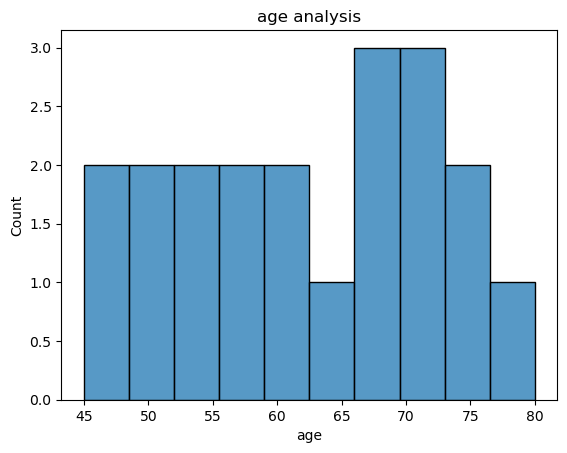

In [77]:
## univariate analysis
sns.histplot(healthcare_data['age'], bins = 10)
plt.title('age analysis')

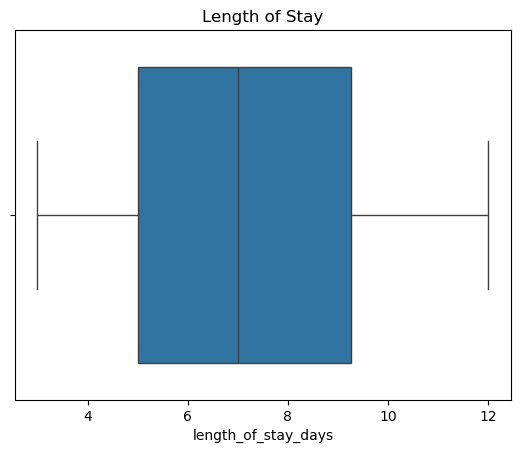

In [83]:
##length of stay
sns.boxplot(x=healthcare_data['length_of_stay_days'])
plt.title("Length of Stay")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

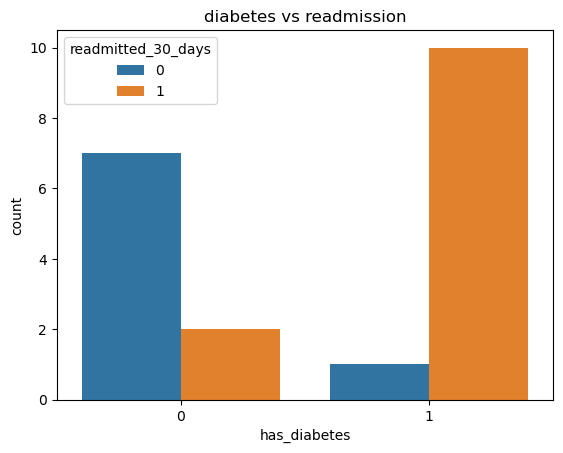

In [85]:
## diabetes vs readmission
sns.countplot(x='has_diabetes', hue='readmitted_30_days', data= healthcare_data)
plt.title('diabetes vs readmission')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

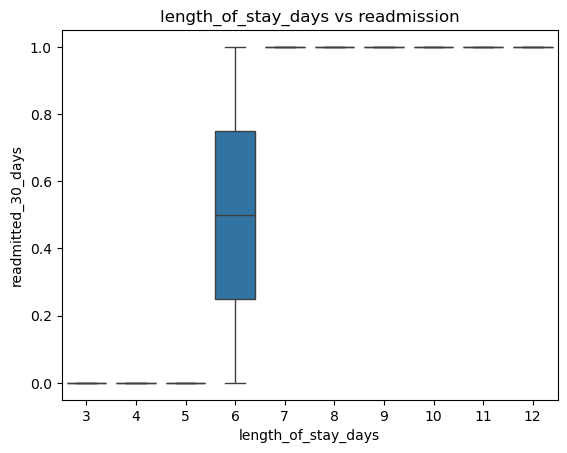

In [87]:
##length_of_stay_days vs readmitted_30_days
sns.boxplot(x= 'length_of_stay_days', y= 'readmitted_30_days',data = healthcare_data)
plt.title('length_of_stay_days vs readmission')
plt.show

In [89]:
## correlation check
healthcare_data.corr(numeric_only = True)

,patient_id,age,length_of_stay_days,has_diabetes,has_hypertension,num_previous_admissions,readmitted_30_days
patient_id,1.000000,0.123794,0.116130,-0.148151,-0.170297,0.070933,0.000000
age,0.123794,1.000000,0.962315,0.527120,0.611058,0.890406,0.850742
length_of_stay_days,0.116130,0.962315,1.000000,0.529192,0.676590,0.916922,0.831373
has_diabetes,-0.148151,0.527120,0.529192,1.000000,0.723747,0.747779,0.697518
has_hypertension,-0.170297,0.611058,0.676590,0.723747,1.000000,0.739549,0.801784
num_previous_admissions,0.070933,0.890406,0.916922,0.747779,0.739549,1.000000,0.842864
readmitted_30_days,0.000000,0.850742,0.831373,0.697518,0.801784,0.842864,1.000000


In [95]:
## creating age group

healthcare_data['age_group'] = pd.cut(healthcare_data['age'], bins = 5, labels = ['<40','40-50', '50-60','60-70','>70'])

healthcare_data['age_group']


0       <40
1     50-60
2     60-70
3       <40
4     60-70
5       >70
6     40-50
7     50-60
8     60-70
9       <40
10      <40
11      >70
12    60-70
13    40-50
14    50-60
15      >70
16    50-60
17      <40
18    40-50
19    60-70
Name: age_group, dtype: category
Categories (5, object): ['<40' < '40-50' < '50-60' < '60-70' < '>70']

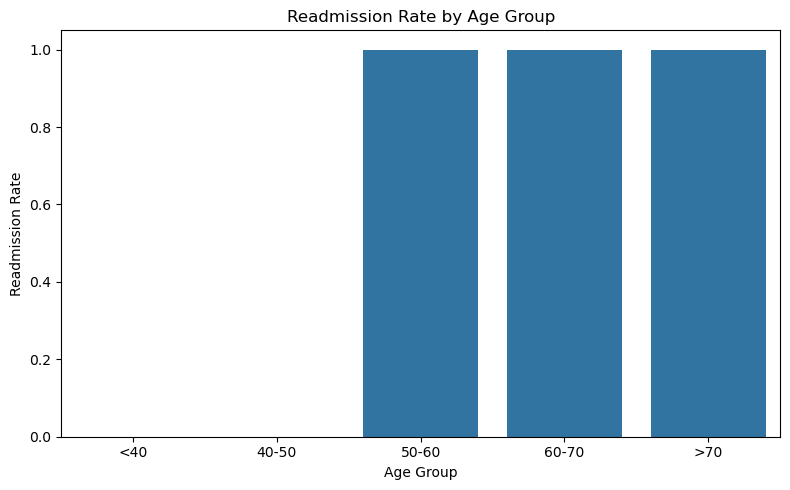

In [163]:
##age_group vs readmission_rate analysis

plt.figure(figsize=(8,5))
sns.barplot(x='age_group', y='readmitted_30_days', data=healthcare_data)
plt.title("Readmission Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Readmission Rate")
plt.tight_layout()
plt.savefig(r"C:\Users\DELL\Documents\Healthcare_Analysis\visuals\age_group vs readmission.png", bbox_inches="tight")

plt.show()

In [99]:
## Create Risk Flags
##high previous admission flag

healthcare_data['high_prev_admission'] = healthcare_data['num_previous_admissions'].apply(lambda x : 1 if x>=2 else 0)
healthcare_data['high_prev_admission']

0     0
1     1
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     0
10    0
11    1
12    1
13    0
14    1
15    1
16    1
17    0
18    0
19    1
Name: high_prev_admission, dtype: int64

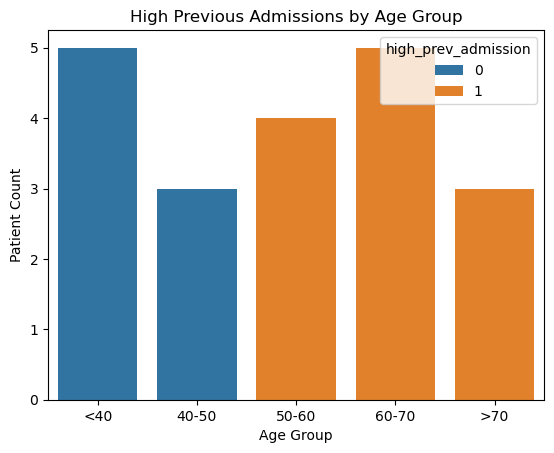

In [161]:
## comparing age_group vs high_prev_admission(Supporting EDA)

sns.countplot(x='age_group',hue='high_prev_admission',data= healthcare_data)
    
    
    

plt.title('High Previous Admissions by Age Group')
plt.xlabel("Age Group")
plt.ylabel("Patient Count")
plt.savefig(r"C:\Users\DELL\Documents\Healthcare_Analysis\visuals\age_group vs high_prev_admission.png", bbox_inches="tight")

plt.show()

In [111]:
##long stay flag

healthcare_data['long_stay'] = healthcare_data['length_of_stay_days'].apply(lambda x : 1 if x>5 else 0)
healthcare_data['long_stay']

0     0
1     1
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     0
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    0
18    0
19    1
Name: long_stay, dtype: int64

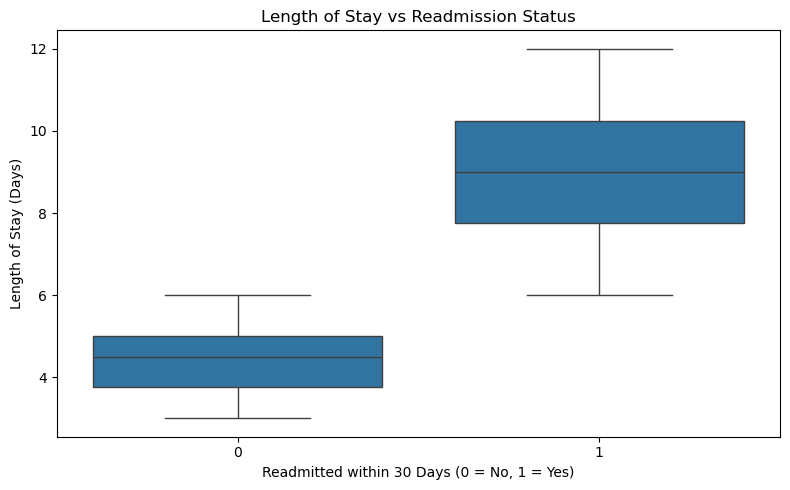

In [157]:
##longstay vs readmission analysis

plt.figure(figsize=(8,5))
sns.boxplot(
    x='readmitted_30_days',
    y='length_of_stay_days',
    data=healthcare_data
)

plt.title("Length of Stay vs Readmission Status")
plt.xlabel("Readmitted within 30 Days (0 = No, 1 = Yes)")
plt.ylabel("Length of Stay (Days)")
plt.tight_layout()
plt.savefig(r"C:\Users\DELL\Documents\Healthcare_Analysis\visuals\length_of_stay_vs_readmission.png", bbox_inches="tight")
plt.show()

In [107]:
##encode gender

healthcare_data['gender_encoded'] = healthcare_data['gender'].map({'M':1, 'F':0})

healthcare_data['gender_encoded']

0     0
1     1
2     1
3     0
4     1
5     0
6     0
7     1
8     1
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17    0
18    0
19    1
Name: gender_encoded, dtype: int64

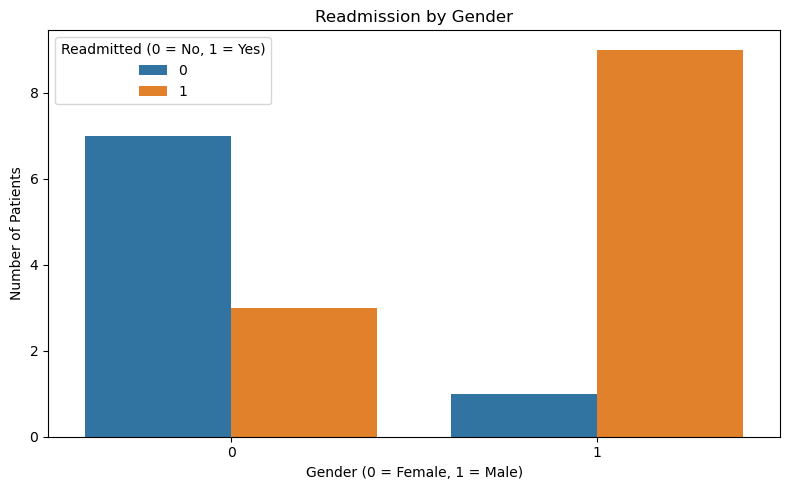

In [159]:
## gender_encoded vs readmission analysis

plt.figure(figsize=(8,5))
sns.countplot(
    x='gender_encoded',
    hue='readmitted_30_days',
    data=healthcare_data
)

plt.title("Readmission by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Number of Patients")
plt.legend(title="Readmitted (0 = No, 1 = Yes)")
plt.tight_layout()
plt.savefig(r"C:\Users\DELL\Documents\Healthcare_Analysis\visuals\gender_encoded vs readmission.png", bbox_inches="tight")
plt.show()

In [115]:
##final feature set
features = [
    'age',
    'gender_encoded',
    'length_of_stay_days',
    'has_diabetes',
    'has_hypertension',
    'num_previous_admissions',
    'high_prev_admission',
    'long_stay'
]

X = healthcare_data[features]
y = healthcare_data['readmitted_30_days']


In [141]:
##Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [139]:
##Train Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [133]:
##Predictions & Evaluation

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [135]:
##Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

importance


,Feature,Coefficient
0,age,0.794109
2,length_of_stay_days,0.223918
5,num_previous_admissions,0.198134
6,high_prev_admission,0.197511
4,has_hypertension,0.196142
1,gender_encoded,0.196083
3,has_diabetes,0.195153
7,long_stay,0.062568


In [143]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)


LogisticRegression(max_iter=1000)

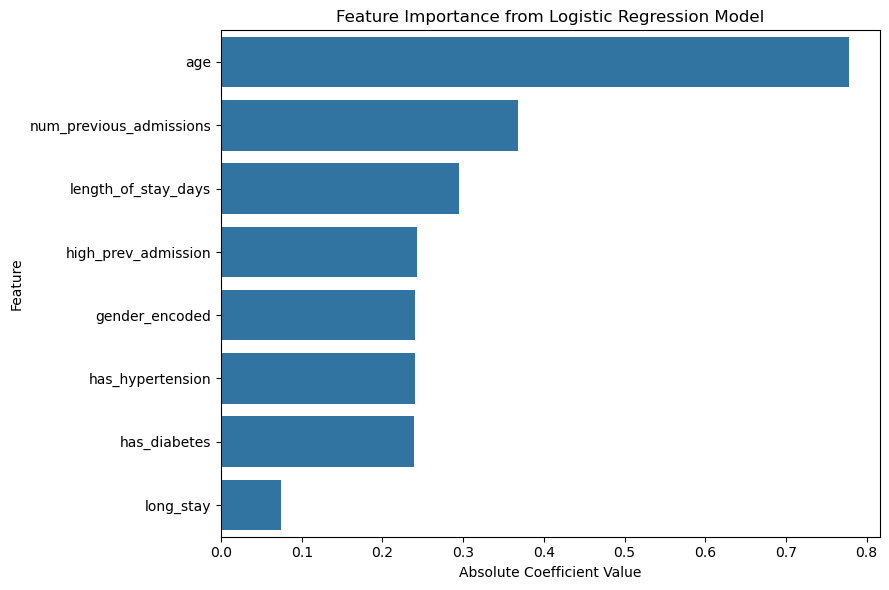

In [165]:
## features analysis
from sklearn.linear_model import LogisticRegression
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_reg.coef_[0]
})

feature_importance['abs_coef'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('abs_coef', ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(
    x='abs_coef',
    y='Feature',
    data=feature_importance
)

plt.title("Feature Importance from Logistic Regression Model")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig(r"C:\Users\DELL\Documents\Healthcare_Analysis\visuals\feature_importance_from_logistic_regression_model.png", bbox_inches="tight")

plt.show()